# A Machine Learning journey from customer reviews to business insights
# *Part 1: Data preparation*

*Author: Federica Lionetto*  
*Email: federica.lionetto@gmail.com*  
*Date: 17 November 2020*  
*License: Creative Commons BY-NC-SA*

*Based on the dataset available at:*
- https://www.kaggle.com/efehandanisman/skytrax-airline-reviews

### First dataset in brief

The first dataset is scraped from Skytrax (https://www.airlinequality.com), an international air transport rating organization based in the UK, whose mission is to improve the customer experience for airlines and airports across the world.  
The dataset consists of individual reviews left by verified customers of most of the major airlines across the world and can be downloaded from https://www.kaggle.com/efehandanisman/skytrax-airline-reviews.  

An individual review contains part or all of the following information:
- **author**
- **review date**
- **route**
- **date flown**
- **type of traveller**
- **service class**
- **overall score** of the travel experience
- **subscores** related to specific aspects of the travel experience, in particular:
  - food and beverage
  - seat comfort 
  - cabin service 
  - ground service
  - entertainment
  - value for money
- **whether the customer would recommend the travel experience to other customers**
- **comments** in a free text format

### Further readings

- "What can we learn from five-star airlines: a web scraping project from Skytrax", https://nycdatascience.com/blog/student-works/web-scraping/what-can-we-learn-from-five-star-airlines-a-web-scraping-project-from-skytrax/


## 1 - Import modules and helper functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')

import datetime as dt
import dateutil

import importlib

In [2]:
# Debugging capabilities.
import pdb

In [3]:
import sys  
sys.path.insert(0, './helper_functions')

In [4]:
# Related to review date.
import get_review_date_timestamp
import get_review_date_day, get_review_date_month, get_review_date_year
import get_review_date_sec_epoch

# Related to date flown. 
import get_date_flown_timestamp
import get_date_flown_day, get_date_flown_month, get_date_flown_year
import get_date_flown_sec_epoch

# Related to review date and date flown.
import get_review_date_date_flown_distance_days

# Related to route.
import has_layover
import get_origin
import get_destination
import get_layover

# Related to review text.
import get_review_characters, get_review_words

# Related to review score.
import get_pos_neu_neg_review_score

# Related to recommendation.
import assign_label_recommended
import get_recommendation_bool

# Related to missing values.
import get_completeness

# Related to visualization.
import plot_hist
import plot_hist_sns
import plot_two_hists_comp_sns
import plot_bar
import plot_grouped_box
import plot_cmap

## 2 - Load the input data

In [5]:
# Type of each field in the input data.
df_dtype = {'airline':str,
            'overall':'Int64',
            'author':str,
            'review_date':str,
            'customer_review':str,
            'aircraft':str,
            'traveller_type':str,
            'cabin':str,
            'route':str,
            'date_flown':str,
            'seat_comfort':'Int64',
            'cabin_service':'Int64',
            'food_bev':'Int64',
            'entertainment':'Int64',
            'ground_service':'Int64',
            'value_for_money':'Int64',
            'recommended':str,
           }

In [6]:
df = pd.read_excel('../Data/capstone_airline_reviews3.xlsx', dtype=df_dtype)

In [7]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
1,Turkish Airlines,7,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4,5,4,4,2,4,yes
2,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
3,Turkish Airlines,2,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4,1,1,1,1,1,no
4,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN


In [8]:
df.shape

(131895, 17)

Get the names of the colums in the dataset.

In [9]:
cols = df.columns.to_list()
print('Columns in the dataset:')
print(cols)

Columns in the dataset:
['airline', 'overall', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended']


Get the total number of customer reviews in the dataset.

In [10]:
n_reviews = df.shape[0]
print('Number of customer reviews in the dataset: {:d}'.format(n_reviews))

Number of customer reviews in the dataset: 131895


## 3 - Quick fixes of the input data

**DISCUSSION**:  
*Spend the next 5-10 minutes looking at the dataset and writing down all aspects related to data quality that, in your opinion, should be taken into account before using the dataset for training a Machine Learning model.*

### 3.1 - Text of the customer review

The preview of the dataset shows that the customer review field usually starts with a special character and a default text, followed by the same information displayed in the route field. We can strip this information away from the customer review field as it does not add any additional value. 

In [11]:
df[['customer_review','route']].head()

,customer_review,route
0,NaN,NaN
1,âœ… Trip Verified | London to Izmir via Istanb...,London to Izmir via Istanbul
2,NaN,NaN
3,âœ… Trip Verified | Istanbul to Bucharest. We ...,Istanbul to Bucharest
4,NaN,NaN


In [12]:
df.iloc[1,:]['customer_review']

'âœ… Trip Verified | London to Izmir via Istanbul. First time Iâ€™d flown TK. I found them very good in the air, cabin crew, planes, food, all very nice. Not so great on the ground, ground staff, call centre, computer systems. My flight from LHR was delayed so I missed the connection in Istanbul. Most ground staff donâ€™t speak English, and I was given contradictory instructions from those that could speak a little English. I eventually got on a flight to Izmir three hours later, but it wasnâ€™t an easy process, made worse by the vast distances one has to walk between gates in the cavernous new airport. Also, Iâ€™d phoned a TK call centre (based in Ukraine) to pay an extra Â£40 or so each way for extra leg room seats. However, as the departure times kept changing, my seats kept changing, and for the return leg to London from Istanbul I was not given an extra leg room seat. Luckily there was a spare exit row seat and the cabin crew sorted me out. Overall, I think their cabin crew and pl

In [13]:
df.iloc[1,:]['route']

'London to Izmir via Istanbul'

In [14]:
df_quick_fixes = df.copy()

In [15]:
# Split the string by the first occurrence of '.' and get the second part of the string.
df_quick_fixes['customer_review_clean'] = df_quick_fixes['customer_review'].str.split('.',n=1,expand=True)[1]

In [16]:
df_quick_fixes['customer_review_clean'].head()

0                                                  NaN
1     First time Iâ€™d flown TK. I found them very ...
2                                                  NaN
3     We make our check in in the airport, they Tak...
4                                                  NaN
Name: customer_review_clean, dtype: object

In [17]:
df_quick_fixes.drop(columns=['customer_review'], inplace=True)

In [18]:
df_quick_fixes.head()

,airline,overall,author,review_date,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,customer_review_clean
0,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
1,Turkish Airlines,7,Christopher Hackley,8th May 2019,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4,5,4,4,2,4,yes,First time Iâ€™d flown TK. I found them very ...
2,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
3,Turkish Airlines,2,Adriana Pisoi,7th May 2019,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4,1,1,1,1,1,no,"We make our check in in the airport, they Tak..."
4,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN


### 3.2 - Rename and drop columns

For simplicity, we rename some of the fields.

In [19]:
df_quick_fixes.rename(columns={'overall':'review_score', 'customer_review_clean':'review_text'}, inplace=True)

We drop the author field as it is not relevant for our use case.

In [20]:
df_quick_fixes.drop(columns=['author'], inplace=True)

In [21]:
df_quick_fixes.head()

,airline,review_score,review_date,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,review_text
0,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
1,Turkish Airlines,7,8th May 2019,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4,5,4,4,2,4,yes,First time Iâ€™d flown TK. I found them very ...
2,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
3,Turkish Airlines,2,7th May 2019,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4,1,1,1,1,1,no,"We make our check in in the airport, they Tak..."
4,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN


## 4 - Feature engineering

We add new features to the dataset in view of model training and testing.

In [22]:
df_aug = df_quick_fixes.copy()

### 4.1 - Handling of dates

What is the format of the review date and date flown?  
Can we add any feature related to dates that could be used in a Machine Learning model?

In [23]:
df_aug[['review_date','date_flown']].dtypes

review_date    object
date_flown     object
dtype: object

In [24]:
df_aug[['review_date','date_flown']].head()

,review_date,date_flown
0,NaN,NaN
1,8th May 2019,2019-05-01 00:00:00
2,NaN,NaN
3,7th May 2019,2019-05-01 00:00:00
4,NaN,NaN


The following features are added to the dataset:
- `review_date_timestamp`
- `review_date_day`
- `review_date_month`
- `review_date_year`
- `review_date_sec_epoch`
- `date_flown_timestamp`
- `date_flown_day`
- `date_flown_month`
- `date_flown_year`
- `date_flown_sec_epoch`
- `review_date_date_flown_distance_days`

#### Review date

In [25]:
df_aug['review_date'].head()

0             NaN
1    8th May 2019
2             NaN
3    7th May 2019
4             NaN
Name: review_date, dtype: object

In [26]:
# Add new features.
df_aug['review_date_timestamp'] = df_aug.apply(lambda x: get_review_date_timestamp.get_review_date_timestamp(x), axis=1)

In [27]:
df_aug[['review_date','review_date_timestamp']].head()

,review_date,review_date_timestamp
0,NaN,NaT
1,8th May 2019,2019-05-08
2,NaN,NaT
3,7th May 2019,2019-05-07
4,NaN,NaT


In [28]:
df_aug['review_date_timestamp'].min()

Timestamp('2002-08-25 00:00:00')

In [29]:
df_aug['review_date_timestamp'].max()

Timestamp('2019-06-29 00:00:00')

In [30]:
# Add new features.
df_aug['review_date_day'] = df_aug.apply(lambda x: get_review_date_day.get_review_date_day(x),axis=1)
df_aug['review_date_month'] = df_aug.apply(lambda x: get_review_date_month.get_review_date_month(x),axis=1)
df_aug['review_date_year'] = df_aug.apply(lambda x: get_review_date_year.get_review_date_year(x),axis=1)

In [31]:
df_aug[['review_date','review_date_timestamp','review_date_day','review_date_month','review_date_year']].head()

,review_date,review_date_timestamp,review_date_day,review_date_month,review_date_year
0,NaN,NaT,NaN,NaN,NaN
1,8th May 2019,2019-05-08,8.0,5.0,2019.0
2,NaN,NaT,NaN,NaN,NaN
3,7th May 2019,2019-05-07,7.0,5.0,2019.0
4,NaN,NaT,NaN,NaN,NaN


In [32]:
# Add new features.
df_aug['review_date_sec_epoch'] = df_aug.apply(lambda x: get_review_date_sec_epoch.get_review_date_sec_epoch(x),axis=1)

In [33]:
df_aug[['review_date','review_date_timestamp','review_date_day','review_date_month','review_date_year','review_date_sec_epoch']].head()

,review_date,review_date_timestamp,review_date_day,review_date_month,review_date_year,review_date_sec_epoch
0,NaN,NaT,NaN,NaN,NaN,NaN
1,8th May 2019,2019-05-08,8.0,5.0,2019.0,1.557274e+09
2,NaN,NaT,NaN,NaN,NaN,NaN
3,7th May 2019,2019-05-07,7.0,5.0,2019.0,1.557187e+09
4,NaN,NaT,NaN,NaN,NaN,NaN


#### Date flown

In [34]:
df_aug['date_flown'].head()

0                    NaN
1    2019-05-01 00:00:00
2                    NaN
3    2019-05-01 00:00:00
4                    NaN
Name: date_flown, dtype: object

In [35]:
# Add new features.
df_aug['date_flown_timestamp'] = df_aug.apply(lambda x: get_date_flown_timestamp.get_date_flown_timestamp(x), axis=1)

In [36]:
df_aug[['date_flown','date_flown_timestamp']].head()

,date_flown,date_flown_timestamp
0,NaN,NaT
1,2019-05-01 00:00:00,2019-05-01
2,NaN,NaT
3,2019-05-01 00:00:00,2019-05-01
4,NaN,NaT


In [37]:
# Add new features.
df_aug['date_flown_day'] = df_aug.apply(lambda x: get_date_flown_day.get_date_flown_day(x),axis=1)
df_aug['date_flown_month'] = df_aug.apply(lambda x: get_date_flown_month.get_date_flown_month(x),axis=1)
df_aug['date_flown_year'] = df_aug.apply(lambda x: get_date_flown_year.get_date_flown_year(x),axis=1)

In [38]:
df_aug[['date_flown','date_flown_timestamp','date_flown_day','date_flown_month','date_flown_year']].head()

,date_flown,date_flown_timestamp,date_flown_day,date_flown_month,date_flown_year
0,NaN,NaT,NaN,NaN,NaN
1,2019-05-01 00:00:00,2019-05-01,1.0,5.0,2019.0
2,NaN,NaT,NaN,NaN,NaN
3,2019-05-01 00:00:00,2019-05-01,1.0,5.0,2019.0
4,NaN,NaT,NaN,NaN,NaN


In [39]:
# Add new features.
df_aug['date_flown_sec_epoch'] = df_aug.apply(lambda x: get_date_flown_sec_epoch.get_date_flown_sec_epoch(x),axis=1)

In [40]:
df_aug[['date_flown','date_flown_timestamp','date_flown_day','date_flown_month','date_flown_year','date_flown_sec_epoch']].head()

,date_flown,date_flown_timestamp,date_flown_day,date_flown_month,date_flown_year,date_flown_sec_epoch
0,NaN,NaT,NaN,NaN,NaN,NaN
1,2019-05-01 00:00:00,2019-05-01,1.0,5.0,2019.0,1.556669e+09
2,NaN,NaT,NaN,NaN,NaN,NaN
3,2019-05-01 00:00:00,2019-05-01,1.0,5.0,2019.0,1.556669e+09
4,NaN,NaT,NaN,NaN,NaN,NaN


#### Time distance in days between review date and date flown

In [41]:
# Add new features.
df_aug['review_date_date_flown_distance_days'] = df_aug.apply(lambda x: get_review_date_date_flown_distance_days.get_review_date_date_flown_distance_days(x),axis=1)

In [42]:
df_aug['review_date_date_flown_distance_days'].dtype

dtype('float64')

In [43]:
df_aug[['date_flown_timestamp','review_date_timestamp','review_date_date_flown_distance_days']].head()

,date_flown_timestamp,review_date_timestamp,review_date_date_flown_distance_days
0,NaT,NaT,NaN
1,2019-05-01,2019-05-08,7.0
2,NaT,NaT,NaN
3,2019-05-01,2019-05-07,6.0
4,NaT,NaT,NaN


### 4.2 - Customer review completeness

The following feature is added to the dataset:
- `is_complete`  

This feature tells us if the customer review is complete, that is, if all the fields contain some information.

In [44]:
# Add new features.
df_aug['is_complete'] = df_aug.apply(lambda x: get_completeness.get_completeness(x),axis=1)

In [45]:
df_aug['is_complete'].dtype

dtype('bool')

In [46]:
df_aug['is_complete'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_complete, dtype: bool

### 4.3 - Customer review length

The following features are added to the dataset:
- `review_characters`, which corresponds to the number of characters in the customer review
- `review_words`, which corresponds to the number of words in the customer review

In [47]:
df_aug['review_text'][3]

' We make our check in in the airport, they Take our luggage , we go to the gate and at the gate surprise they dont let uÈ™ board with two children, because they say the flight is overbooked. We had to wait in the airport with two children until 5 oclock in the morning until they bring uÈ™ to a hotel 2 hours far away from the airport without luggage, without eat without nothing. Our first and last flight with this airline.'

In [48]:
# Add new features.
df_aug['review_characters'] = df_aug.apply(lambda x: get_review_characters.get_review_characters(x),axis=1)
df_aug['review_words'] = df_aug.apply(lambda x: get_review_words.get_review_words(x),axis=1)

In [49]:
df_aug['review_characters'].head()

0       0
1    1094
2       0
3     425
4       0
Name: review_characters, dtype: int64

In [50]:
df_aug['review_words'].head()

0      0
1    200
2      0
3     83
4      0
Name: review_words, dtype: int64

### 4.4 - Review score category

The following feature is added to the dataset:
- `pos_neu_neg_review_score`

This feature has three possible values:
- `neg`, which stands for negative, if the review score is between 1 and 4
- `neu`, which stands for neutral, if the review score is between 5 and 6
- `pos`, which stands for positive, if the review score is between 7 and 10

In [51]:
df_aug['review_score'].unique()

<IntegerArray>
[<NA>, 7, 2, 3, 10, 1, 6, 8, 5, 4, 9]
Length: 11, dtype: Int64

In [52]:
df_aug['review_score'].describe()

count    64017.000000
mean         5.145430
std          3.477532
min          1.000000
25%          1.000000
50%          5.000000
75%          9.000000
max         10.000000
Name: review_score, dtype: float64

In [53]:
# Add new features.
df_aug['pos_neu_neg_review_score'] = df_aug.apply(lambda x: get_pos_neu_neg_review_score.get_pos_neu_neg_review_score(x),axis=1)

In [54]:
df_aug['pos_neu_neg_review_score'].dtype

dtype('O')

In [55]:
df_aug[['review_score','pos_neu_neg_review_score']].head()

,review_score,pos_neu_neg_review_score
0,<NA>,None
1,7,pos
2,<NA>,None
3,2,neg
4,<NA>,None


### 4.5 - Consolidation of aircraft names

**DISCUSSION**:  
*How would you consolidate the aircraft names?*

In [56]:
print('Number of unique values: {:d}'.format(df_aug['aircraft'].nunique()))
df_aug.groupby(['aircraft']).size().sort_values(ascending=False).reset_index(name='frequency')

Number of unique values: 2088


,aircraft,frequency
0,A320,2157
1,Boeing 777,1215
2,A380,1109
3,A330,1074
4,Boeing 737-800,1036
...,...,...
2083,"Boeing 767-300ER, A320-200",1
2084,Boeing 767-400 / Boeing 737-900,1
2085,Boeing 767-400 / MD88 / B717,1
2086,Boeing 767-600,1


For simplicity, we drop the feature `aircraft`.

In [57]:
df_aug.drop(columns=['aircraft'],inplace=True)

### 4.6 - Consolidation of route names

**DISCUSSION**:  
*How would you consolidate the route names?  
Could you engineer some new features corresponding to origin and destination airports, as well as layovers?  
How would you do it in a "smart" way (no brute force approaches)?*

In [58]:
df_aug['route'].head()

0                             NaN
1    London to Izmir via Istanbul
2                             NaN
3           Istanbul to Bucharest
4                             NaN
Name: route, dtype: object

In [59]:
df_aug['origin'] = df_aug.apply(lambda x: get_origin.get_origin(x), axis=1)
df_aug['destination'] = df_aug.apply(lambda x: get_destination.get_destination(x), axis=1)
df_aug['layover'] = df_aug.apply(lambda x: get_layover.get_layover(x), axis=1)

In [60]:
df_aug[['route','origin','destination','layover']].head()

,route,origin,destination,layover
0,NaN,None,None,None
1,London to Izmir via Istanbul,London,Izmir,Istanbul
2,NaN,None,None,None
3,Istanbul to Bucharest,Istanbul,Bucharest,NA
4,NaN,None,None,None


In [61]:
df_aug['has_layover'] = df_aug.apply(lambda x: has_layover.has_layover(x), axis=1)

In [62]:
df_aug[['route','origin','destination','layover','has_layover']].head()

,route,origin,destination,layover,has_layover
0,NaN,None,None,None,False
1,London to Izmir via Istanbul,London,Izmir,Istanbul,True
2,NaN,None,None,None,False
3,Istanbul to Bucharest,Istanbul,Bucharest,NA,False
4,NaN,None,None,None,False


In [63]:
df_aug.shape

(131895, 34)

In [64]:
df_aug[df_aug['has_layover']==False].shape

(119137, 34)

In [65]:
df_aug[df_aug['has_layover']==True].shape

(12758, 34)

In [66]:
df_aug['origin'].unique().tolist()

[None,
 'London',
 'Istanbul',
 'Rome',
 'Washington Dulles',
 'Mumbai',
 'Basel',
 'Abu Dhabi',
 'Venice',
 'New York',
 'Tehran',
 'Belgrade',
 'Dublin',
 'Houston',
 'Tashkent',
 'Nakhchivan',
 'London Heathrow',
 'Izmir',
 'New Delhi',
 'Singapore',
 'Baku',
 'New York JFK',
 'Kathmandu',
 'Montreal',
 'Guangzhou',
 'Vienna',
 'Atlanta',
 'Prague',
 'Amsterdam',
 'Helsinki',
 'Hurghada',
 'Manila',
 'Dhaka',
 'Hanoi',
 'Phuket',
 'Ankara',
 'Lyon',
 'Nairobi',
 'Khartoum',
 'Copenhagen',
 'Dalaman',
 'Dubai',
 'Malaga',
 'San Francisco',
 'Kuala Lumpur',
 'Maputo',
 'Toronto',
 'Berlin',
 'Athens',
 'Tel Aviv',
 'Sharm el Sheikh',
 'Sao Paulo',
 'Ä°stanbul',
 'Boston',
 'Alexandria',
 'Kilaminjaro',
 'Stockholm',
 'Lahore',
 'Durban',
 'Tirana',
 'Cape Town',
 'Riyadh',
 'Washington',
 'London Gatwick',
 'Johannesburg',
 'Taipei',
 'Chicago',
 'Brussels',
 'Paris',
 'Istanbul AtatÃ¼rk',
 'FRA',
 'Manchester',
 'Cairo',
 'Gatwick',
 'Cologne',
 'Edinburgh',
 'Lvov',
 'Lisbon',
 'Bei

We can categorise the information specified in the route field into four different fields, corresponding to origin, destination, layover and whether the flight has a layover.  
However, we see that origin, destination and layover are still written according to multiple formats, for example with the name of the city, with the name of the airport, or with the airport code. For the Machine Learning model, each way of writing the origin and destination represents a different entity, i.e. a different value of these features. In order to properly use these features within a Machine Learning model, we should first consolidate the possible values and make sure that one convention is followed throughout the dataset. This is out of scope for the current exercise, but it is important to keep it in mind.

We drop the features `route`, `origin`, `destination` and `layover`.  

In [67]:
df_aug.drop(columns=['route','origin','destination','layover'],inplace=True)

### 4.7 - Recommendation

In [68]:
df_aug['recommended'].unique()

array([nan, 'yes', 'no'], dtype=object)

In [69]:
df_aug['recommended_bool'] = df_aug.apply(lambda x: get_recommendation_bool.get_recommendation_bool(x), axis=1)

In [70]:
df_aug[['recommended','recommended_bool']].head()

,recommended,recommended_bool
0,NaN,None
1,yes,True
2,NaN,None
3,no,False
4,NaN,None


In [71]:
df_aug.drop(columns=['recommended'], inplace=True)
df_aug.rename(columns={'recommended_bool':'recommended'}, inplace=True)

In [72]:
df_aug.head()

,airline,review_score,review_date,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,...,date_flown_month,date_flown_year,date_flown_sec_epoch,review_date_date_flown_distance_days,is_complete,review_characters,review_words,pos_neu_neg_review_score,has_layover,recommended
0,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,False,0,0,None,False,None
1,Turkish Airlines,7,8th May 2019,Business,Economy Class,2019-05-01 00:00:00,4,5,4,4,...,5.0,2019.0,1.556669e+09,7.0,False,1094,200,pos,True,True
2,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,False,0,0,None,False,None
3,Turkish Airlines,2,7th May 2019,Family Leisure,Economy Class,2019-05-01 00:00:00,4,1,1,1,...,5.0,2019.0,1.556669e+09,6.0,False,425,83,neg,False,False
4,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,False,0,0,None,False,None


### 4.8 - A quick look at all the features

In [73]:
cols_aug = df_aug.columns.to_list()
print('Columns in the augmented dataset:')
print(cols_aug)

Columns in the augmented dataset:
['airline', 'review_score', 'review_date', 'traveller_type', 'cabin', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'review_text', 'review_date_timestamp', 'review_date_day', 'review_date_month', 'review_date_year', 'review_date_sec_epoch', 'date_flown_timestamp', 'date_flown_day', 'date_flown_month', 'date_flown_year', 'date_flown_sec_epoch', 'review_date_date_flown_distance_days', 'is_complete', 'review_characters', 'review_words', 'pos_neu_neg_review_score', 'has_layover', 'recommended']


In [74]:
df_aug.head()

,airline,review_score,review_date,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,...,date_flown_month,date_flown_year,date_flown_sec_epoch,review_date_date_flown_distance_days,is_complete,review_characters,review_words,pos_neu_neg_review_score,has_layover,recommended
0,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,False,0,0,None,False,None
1,Turkish Airlines,7,8th May 2019,Business,Economy Class,2019-05-01 00:00:00,4,5,4,4,...,5.0,2019.0,1.556669e+09,7.0,False,1094,200,pos,True,True
2,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,False,0,0,None,False,None
3,Turkish Airlines,2,7th May 2019,Family Leisure,Economy Class,2019-05-01 00:00:00,4,1,1,1,...,5.0,2019.0,1.556669e+09,6.0,False,425,83,neg,False,False
4,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,False,0,0,None,False,None


In [75]:
df_aug.drop(columns=['review_date','date_flown','review_date_timestamp','review_date_sec_epoch','date_flown_timestamp','date_flown_sec_epoch'], inplace=True)

In [76]:
df_aug.head()

,airline,review_score,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,...,date_flown_day,date_flown_month,date_flown_year,review_date_date_flown_distance_days,is_complete,review_characters,review_words,pos_neu_neg_review_score,has_layover,recommended
0,NaN,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,False,0,0,None,False,None
1,Turkish Airlines,7,Business,Economy Class,4,5,4,4,2,4,...,1.0,5.0,2019.0,7.0,False,1094,200,pos,True,True
2,NaN,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,False,0,0,None,False,None
3,Turkish Airlines,2,Family Leisure,Economy Class,4,1,1,1,1,1,...,1.0,5.0,2019.0,6.0,False,425,83,neg,False,False
4,NaN,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,False,0,0,None,False,None


## 5 - Filling rates

Depending on which Machine Learning algorithm we plan to use, we might want to drop records that contain missing values.  
As a first step, we look at the filling rates of each feature in the dataset, to get a feeling of what is available and how often.

### 5.1 - First iteration

In [77]:
# Percentage of non-null values.
filling_rates = 100.*df_aug.count().sort_values(ascending=False)/df_aug.shape[0]
print(filling_rates)

has_layover                             100.000000
review_words                            100.000000
review_characters                       100.000000
is_complete                             100.000000
review_date_day                          49.999621
review_date_year                         49.999621
review_date_month                        49.999621
airline                                  49.999621
review_text                              49.941999
recommended                              48.857045
pos_neu_neg_review_score                 48.536336
review_score                             48.536336
value_for_money                          48.504492
cabin                                    47.994996
cabin_service                            46.032829
seat_comfort                             46.007051
food_bev                                 39.886273
entertainment                            33.506198
traveller_type                           30.141400
date_flown_month               

In [78]:
values_filling_rates = filling_rates.values
# print(values_filling_rates)
text_filling_rates = filling_rates.index.to_list()
# print(text_filling_rates)

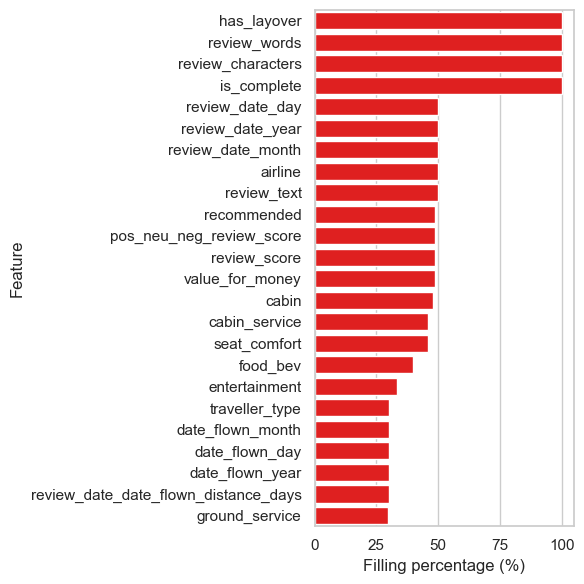

In [79]:
plt.figure(figsize=(6,6),dpi=100)
sns.set(style="whitegrid")
ax = sns.barplot(x=values_filling_rates, y=text_filling_rates,color="Red")
ax.set(xlabel='Filling percentage (%)', ylabel='Feature')
plt.tight_layout()
plt.savefig('../Results/01/FillingRates1.png')
plt.show()

We notice that there is a subset of customer reviews for which both the airline and the review date are missing. These records will be dropped from our dataset as they likely indicate a data quality issue.

In [80]:
df_aug[df_aug['airline'].notna()].shape

(65947, 24)

In [81]:
df_aug[df_aug['airline'].isna()].shape

(65948, 24)

In [82]:
df_without_na_1 = df_aug[df_aug['airline'].notna()].copy()

In [83]:
df_without_na_1.shape

(65947, 24)

In [84]:
df_without_na_1.head()

,airline,review_score,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,...,date_flown_day,date_flown_month,date_flown_year,review_date_date_flown_distance_days,is_complete,review_characters,review_words,pos_neu_neg_review_score,has_layover,recommended
1,Turkish Airlines,7,Business,Economy Class,4,5,4,4,2,4,...,1.0,5.0,2019.0,7.0,False,1094,200,pos,True,True
3,Turkish Airlines,2,Family Leisure,Economy Class,4,1,1,1,1,1,...,1.0,5.0,2019.0,6.0,False,425,83,neg,False,False
5,Turkish Airlines,3,Business,Economy Class,1,4,1,3,1,2,...,1.0,5.0,2019.0,6.0,False,1597,293,neg,True,False
7,Turkish Airlines,10,Solo Leisure,Economy Class,4,5,5,5,5,5,...,16.0,4.0,2019.0,20.0,True,875,151,pos,False,True
9,Turkish Airlines,1,Solo Leisure,Economy Class,1,1,1,1,1,1,...,1.0,5.0,2019.0,5.0,False,366,69,neg,True,False


### 5.2 - Second iteration

In [85]:
# Percentage of non-null values.
filling_rates_without_na_1 = 100.*df_without_na_1.count().sort_values(ascending=False)/df_without_na_1.shape[0]
print(filling_rates_without_na_1)

review_date_day                         100.000000
is_complete                             100.000000
has_layover                             100.000000
review_date_month                       100.000000
review_date_year                        100.000000
airline                                 100.000000
review_characters                       100.000000
review_words                            100.000000
review_text                              99.884756
recommended                              97.714832
review_score                             97.073407
pos_neu_neg_review_score                 97.073407
value_for_money                          97.009720
cabin                                    95.990720
cabin_service                            92.066356
seat_comfort                             92.014800
food_bev                                 79.773151
entertainment                            67.012904
traveller_type                           60.283258
review_date_date_flown_distance

In [86]:
values_filling_rates_without_na_1 = filling_rates_without_na_1.values
# print(values_filling_rates)
text_filling_rates_without_na_1 = filling_rates_without_na_1.index.to_list()
# print(text_filling_rates)

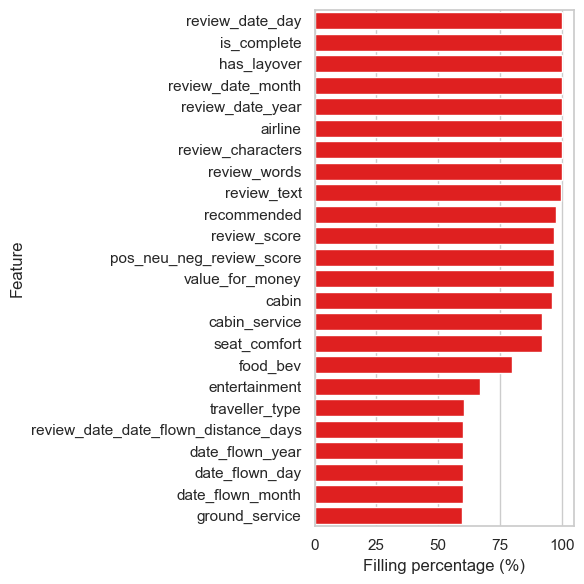

In [87]:
plt.figure(figsize=(6,6),dpi=100)
sns.set(style="whitegrid")
ax = sns.barplot(x=values_filling_rates_without_na_1, y=text_filling_rates_without_na_1,color="Red")
ax.set(xlabel='Filling percentage (%)', ylabel='Feature')
plt.tight_layout()
plt.savefig('../Results/01/FillingRates2.png')
plt.show()

At this point, we might proceed in different ways, based on the required tradeoff between dataset size and dataset quality/completeness. The best way to go depends on the specific problem at hand. For example, if we plan to train a complex Machine Learning model (e.g., a Deep Neural Network) that can handle missing values, we might prefer to keep the dataset as it is to use as many records as possible in the training phase. On the other hand, if we plan to train a simple Machine Learning model (e.g., a Decision Tree), we might prefer to drop the missing values as we do not expect the Machine Learning model to need million data points.  
Here, we decide to opt for the highest data quality and completeness, so we keep only records for which all the information is available. 

In [88]:
df_without_na_2 = df_without_na_1.dropna(axis=0,how='any').copy()

In [89]:
df_without_na_2.shape

(24563, 24)

In [90]:
df_without_na_2.head()

,airline,review_score,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,...,date_flown_day,date_flown_month,date_flown_year,review_date_date_flown_distance_days,is_complete,review_characters,review_words,pos_neu_neg_review_score,has_layover,recommended
1,Turkish Airlines,7,Business,Economy Class,4,5,4,4,2,4,...,1.0,5.0,2019.0,7.0,False,1094,200,pos,True,True
3,Turkish Airlines,2,Family Leisure,Economy Class,4,1,1,1,1,1,...,1.0,5.0,2019.0,6.0,False,425,83,neg,False,False
5,Turkish Airlines,3,Business,Economy Class,1,4,1,3,1,2,...,1.0,5.0,2019.0,6.0,False,1597,293,neg,True,False
7,Turkish Airlines,10,Solo Leisure,Economy Class,4,5,5,5,5,5,...,16.0,4.0,2019.0,20.0,True,875,151,pos,False,True
9,Turkish Airlines,1,Solo Leisure,Economy Class,1,1,1,1,1,1,...,1.0,5.0,2019.0,5.0,False,366,69,neg,True,False


In [91]:
n_reviews_without_na_2 = df_without_na_2.shape[0]
print('Number of customer reviews in the dataset, excluding all missing values: {:d}'.format(n_reviews_without_na_2))

Number of customer reviews in the dataset, excluding all missing values: 24563


In [92]:
f_reviews_without_na_2 = n_reviews_without_na_2/n_reviews
print('Fraction of the original dataset: {:f}'.format(f_reviews_without_na_2))

Fraction of the original dataset: 0.186231


## 6 - Overview of the different types of features

In [93]:
df_without_na_2.dtypes

airline                                  object
review_score                              Int64
traveller_type                           object
cabin                                    object
seat_comfort                              Int64
cabin_service                             Int64
food_bev                                  Int64
entertainment                             Int64
ground_service                            Int64
value_for_money                           Int64
review_text                              object
review_date_day                         float64
review_date_month                       float64
review_date_year                        float64
date_flown_day                          float64
date_flown_month                        float64
date_flown_year                         float64
review_date_date_flown_distance_days    float64
is_complete                                bool
review_characters                         int64
review_words                            

### 6.1 Boolean features

In [94]:
df_for_training = df_without_na_2.copy()

In [95]:
df_for_training['is_complete'].unique()

array([False,  True])

In [96]:
df_for_training.drop(columns=['is_complete'], inplace=True)

In [97]:
cols_for_training = df_for_training.columns.to_list()

In [98]:
feats_bool = ['recommended',
              'has_layover']

### 6.2 Categorical and numerical features

In [99]:
feats_cat = ['airline',
             'traveller_type',
             'cabin','review_text',
             'pos_neu_neg_review_score']

In [100]:
feats_num = [feat for feat in cols_for_training if feat not in feats_bool and feat not in feats_cat]

### 6.3 - Summary

In [101]:
print('Boolean features: \n{}\n'.format(feats_bool))
print('Categorical features: \n{}\n'.format(feats_cat))
print('Numerical features: \n{}\n'.format(feats_num))

Boolean features: 
['recommended', 'has_layover']

Categorical features: 
['airline', 'traveller_type', 'cabin', 'review_text', 'pos_neu_neg_review_score']

Numerical features: 
['review_score', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'review_date_day', 'review_date_month', 'review_date_year', 'date_flown_day', 'date_flown_month', 'date_flown_year', 'review_date_date_flown_distance_days', 'review_characters', 'review_words']



## 7 - Correlation matrix for numerical features

What is the correlation between numerical features? Can we observe any interesting pattern here?

In [102]:
corr_values = df_for_training[feats_num].dropna(axis=0,how='any').corr()

In [103]:
corr_values

,review_score,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,review_date_day,review_date_month,review_date_year,date_flown_day,date_flown_month,date_flown_year,review_date_date_flown_distance_days,review_characters,review_words
review_score,1.000000,0.797787,0.804015,0.801939,0.723824,0.823219,0.898129,0.006017,0.002277,-0.159024,-0.017283,-0.004442,-0.166375,0.089198,-0.211383,-0.231043
seat_comfort,0.797787,1.000000,0.714115,0.726649,0.698609,0.675972,0.759308,0.006055,0.004789,-0.117298,-0.019266,-0.000534,-0.125050,0.087563,-0.129722,-0.146555
cabin_service,0.804015,0.714115,1.000000,0.768552,0.645361,0.685032,0.748612,0.003330,-0.005148,-0.113930,-0.016763,-0.003897,-0.121215,0.069399,-0.153077,-0.169033
food_bev,0.801939,0.726649,0.768552,1.000000,0.712357,0.659985,0.754576,0.003615,-0.005261,-0.112497,-0.018166,-0.003408,-0.123531,0.100786,-0.150006,-0.165800
entertainment,0.723824,0.698609,0.645361,0.712357,1.000000,0.614596,0.680439,-0.006596,-0.019526,-0.087947,-0.017462,-0.021295,-0.096754,0.085192,-0.111532,-0.125489
ground_service,0.823219,0.675972,0.685032,0.659985,0.614596,1.000000,0.768995,0.007355,0.002977,-0.131619,-0.018249,0.000003,-0.137971,0.071654,-0.205318,-0.222029
value_for_money,0.898129,0.759308,0.748612,0.754576,0.680439,0.768995,1.000000,0.005680,0.000707,-0.153323,-0.019578,-0.008452,-0.159412,0.082794,-0.177083,-0.196580
review_date_day,0.006017,0.006055,0.003330,0.003615,-0.006596,0.007355,0.005680,1.000000,0.038293,-0.019680,-0.011253,0.013410,0.000427,0.043643,-0.000281,-0.000627
review_date_month,0.002277,0.004789,-0.005148,-0.005261,-0.019526,0.002977,0.000707,0.038293,1.000000,-0.344405,0.075012,0.743144,-0.282721,0.012987,-0.008009,-0.008342
review_date_year,-0.159024,-0.117298,-0.113930,-0.112497,-0.087947,-0.131619,-0.153323,-0.019680,-0.344405,1.000000,-0.055435,-0.274610,0.979829,-0.030521,0.041206,0.044195


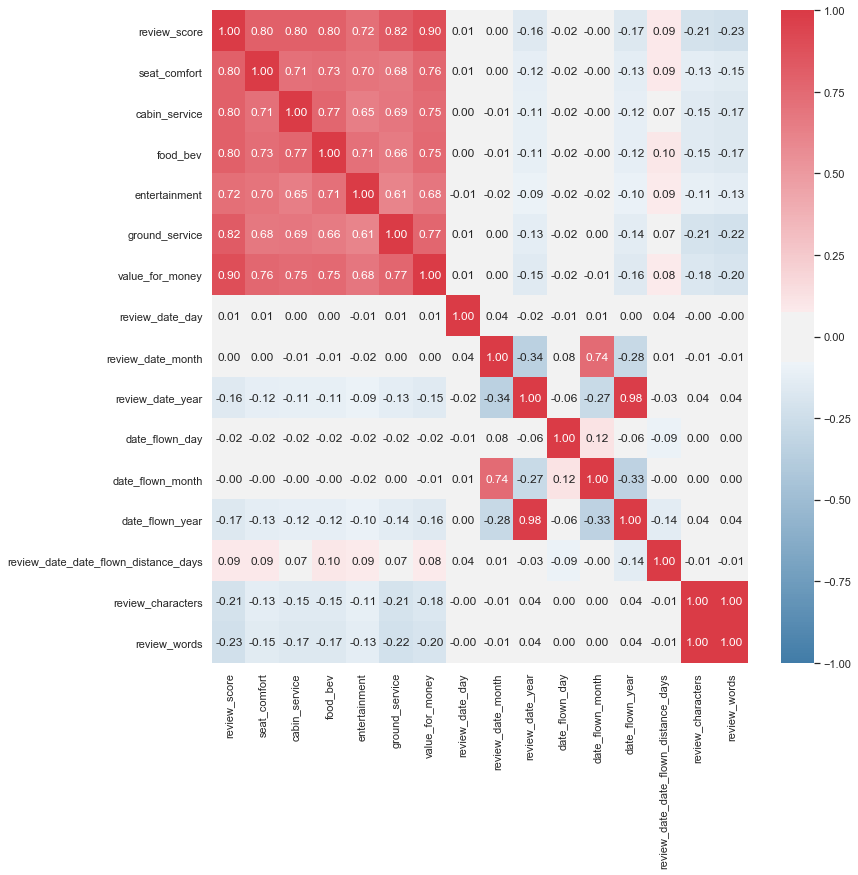

In [104]:
plot_cmap.plot_cmap(matrix_values=corr_values, 
          figsize_w=12, 
          figsize_h=12, 
          filename='../Results/01/Corr.png')

We observe three main things here:
- a positive correlation between the different types of review scores and subscores
- a negative correlation between the length of the review text and the value of the different types of review scores and subscores
- the similarity between using the number of characters and the number of words, from which we conclude that we can drop one of the two features

The correlation of the review subscores with the overall review score gives important indications on which aspects are particularly valued by customers. For example, the review subscore that has the highest correlation with the overall review score is the value for money, while the review subscore that has the lowest correlation with the overall review score is the entertainment. This could suggest that value for money is what customers value, while entertainment is not so critical for a good travel experience. The other review subscores (food and beverage, seat comfort, cabin service and ground service) all have a similar correlation with the overall review score.

In [105]:
df_for_training_small = df_for_training.drop(columns=['review_words']).copy()

In [106]:
cols_for_training_small = df_for_training_small.columns.to_list()

In [107]:
feats_num_for_training_small = [feat for feat in cols_for_training_small if feat not in feats_bool and feat not in feats_cat]

In [108]:
print('Boolean features: \n{}\n'.format(feats_bool))
print('Categorical features: \n{}\n'.format(feats_cat))
print('Numerical features: \n{}\n'.format(feats_num_for_training_small))

Boolean features: 
['recommended', 'has_layover']

Categorical features: 
['airline', 'traveller_type', 'cabin', 'review_text', 'pos_neu_neg_review_score']

Numerical features: 
['review_score', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'review_date_day', 'review_date_month', 'review_date_year', 'date_flown_day', 'date_flown_month', 'date_flown_year', 'review_date_date_flown_distance_days', 'review_characters']



## 8 - Distinct values for categorical features

How many unique values exist for each feature?

In [109]:
for col in df_for_training_small:
    print('Column:', col)
    print('Number of unique values:', df_for_training_small[col].nunique())
    if (col != 'review_text' and col != 'review_date_date_flown_distance_days' and col != 'review_characters'):
        print(df_for_training_small[col].unique())
    print('')

Column: airline
Number of unique values: 81
['Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Air Canada rouge' 'airBaltic' '

In [110]:
for col in df_for_training_small:
    print('Column:', col)
    print('Number of unique values:', df_for_training_small[col].nunique())
    if (col != 'review_text' and col != 'review_date_date_flown_distance_days' and col != 'review_characters'):
        print(df_for_training_small.groupby([col]).size().sort_values(ascending=False))
    print('')

Column: airline
Number of unique values: 81
airline
Cathay Pacific Airways     1354
American Airlines          1330
United Airlines            1292
British Airways            1257
China Southern Airlines    1151
                           ... 
Thai Smile Airways           12
Tunisair                     10
Adria Airways                 9
Germanwings                   6
QantasLink                    4
Length: 81, dtype: int64

Column: review_score
Number of unique values: 10
review_score
1     6286
9     3156
10    3105
8     2742
2     2431
7     1771
3     1769
5     1156
4     1107
6     1040
dtype: int64

Column: traveller_type
Number of unique values: 4
traveller_type
Solo Leisure      9159
Couple Leisure    6246
Family Leisure    4686
Business          4472
dtype: int64

Column: cabin
Number of unique values: 4
cabin
Economy Class      17662
Business Class      4859
Premium Economy     1318
First Class          724
dtype: int64

Column: seat_comfort
Number of unique values: 5
seat

Feature: airline
Values of the feature: ['Cathay Pacific Airways', 'American Airlines', 'United Airlines', 'British Airways', 'China Southern Airlines', 'Emirates', 'Qatar Airways', 'Turkish Airlines', 'Air China', 'Etihad Airways', 'Delta Air Lines', 'Qantas Airways', 'Singapore Airlines', 'Air Canada rouge', 'Air Canada', 'Air India', 'Spirit Airlines', 'Lufthansa', 'KLM Royal Dutch Airlines', 'Frontier Airlines', 'Air France', 'Thai Airways', 'Norwegian', 'Garuda Indonesia', 'Jetblue Airways', 'China Eastern Airlines', 'Swiss Intl Air Lines', 'Southwest Airlines', 'Air New Zealand', 'Aeromexico', 'Finnair', 'Air Europa', 'EVA Air', 'TAP Portugal', 'Ethiopian Airlines', 'Alaska Airlines', 'Icelandair', 'ANA All Nippon Airways', 'WOW air', 'Aeroflot Russian Airlines', 'Alitalia', 'Iberia', 'SAS Scandinavian', 'LATAM Airlines', 'Korean Air', 'Aer Lingus', 'Sunwing Airlines', 'Ryanair', 'LOT Polish Airlines', 'Vueling Airlines', 'Asiana Airlines', 'Kuwait Airways', 'Wizz Air', 'Avianca'

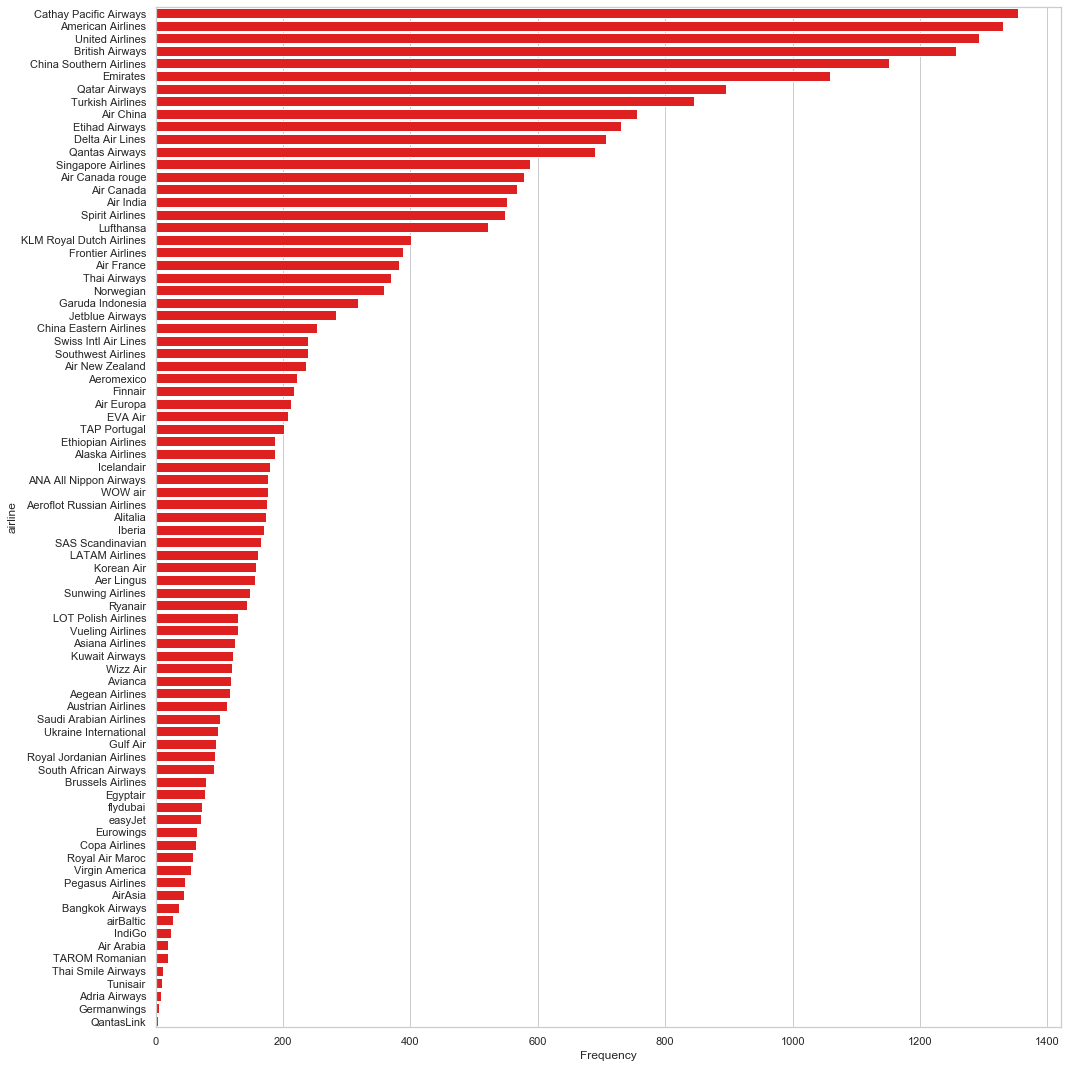

Feature: traveller_type
Values of the feature: ['Solo Leisure', 'Couple Leisure', 'Family Leisure', 'Business']
Frequencies of the feature: [9159, 6246, 4686, 4472]


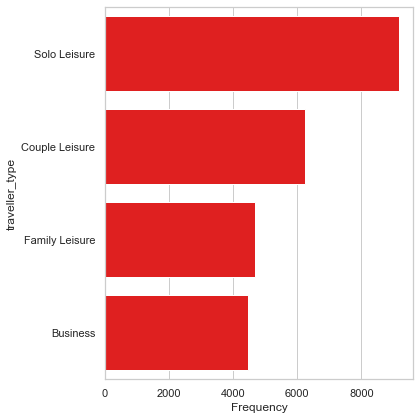

Feature: cabin
Values of the feature: ['Economy Class', 'Business Class', 'Premium Economy', 'First Class']
Frequencies of the feature: [17662, 4859, 1318, 724]


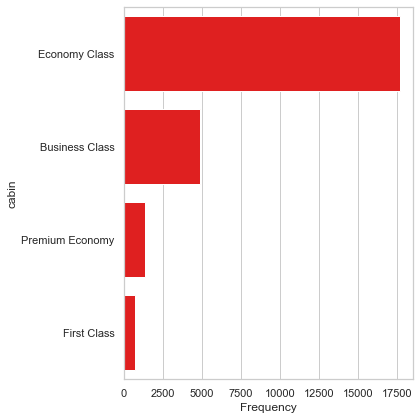

Feature: pos_neu_neg_review_score
Values of the feature: ['neg', 'pos', 'neu']
Frequencies of the feature: [11593, 10774, 2196]


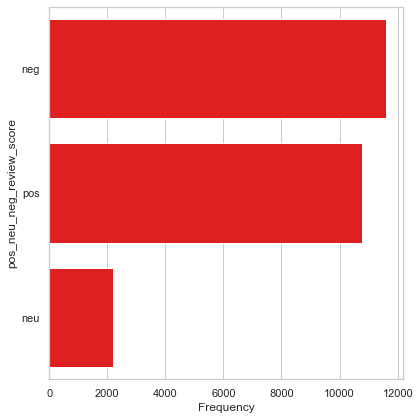

In [111]:
# Bar plot of occurrences of each value of each categorical feature.
for feat in feats_cat:
    if (feat != 'review_text' and feat != 'origin_city' and feat != 'destination_city' and feat != 'layover_city'):
        if (feat == 'airline'):
            plot_bar.plot_bar(df=df_for_training_small,
                              feat=feat,
                              filename='../Results/01/CatFeatureValues-'+feat+'.png',
                              horizontal=True,
                              figsize_w=15,
                              figsize_h=15)
        else:
            plot_bar.plot_bar(df=df_for_training_small,
                              feat=feat,
                              filename='../Results/01/CatFeatureValues-'+feat+'.png',
                              horizontal=True,
                              figsize_w=None,
                              figsize_h=None)

Out of the total number of selected customer reviews (24563):
- There are 81 distinct airlines, assuming the same airline does not have different abbreviations or ways to spell their name. The airlines are not equally represented in the dataset. The most represented airline is Cathay Pacific Airways and the least represented airline is QantasLink.
- The review dates cover 31 days, 12 months and 5 years, from 2015 to 2019.
- The dates flown cover 2 days, 12 months and 7 years, from 2013 to 2019. This means that passengers can submit a review several years after the date flown. Would it make sense to restrict the dataset to customer reviews submitted soon after the date flown? What could be the implications?
- There are 22814 distinct review texts but 24563 selected customer reviews. This means that some reviews might be identical. This should be investigated more in detail.
- The review score ranges from 1 to 10.
- The review subscores range from 1 to 5.
- There are 4 distinct traveller types (from the most represented to the least, solo leisure, couple leisure, business and family leisure).
- There are 4 distinct cabins (from the most represented to the least, economy class, business class, premium economy and first class).

## 9 - Reviews having the same review text

We start by counting how many times each review text appears in the dataset. We sort the corresponding dataframe by number of customer reviews, in descending order.

In [112]:
df_same_review_text = df_for_training_small.groupby('review_text')['review_text'].count().reset_index(name='n_reviews').sort_values(by='n_reviews',ascending=False)

We select only the review texts that appear more than once in the dataset.

In [113]:
df_same_review_text[df_same_review_text['n_reviews']>1]

,review_text,n_reviews
0,,6
5845,"For once, we have very positive things to say...",3
3054,Check in no hassle. The service was not as wa...,2
3026,Check in fast and friendly as everyone was in...,2
3027,"Check in fast and friendly, Lounge No 1 isnâ€...",2
...,...,...
997,Alcoholic drinks are for sale only during tra...,2
22148,While this was not the best airline I have fl...,2
11507,"Lovely flight, this plane is such an improvem...",2
11878,My first connection BOM-DEL was delayed with ...,2


The first case corresponds to customer reviews for which the customers did not leave any review text. Apart from the missing review text, these seems to be valid customer reviews and there is no apparent reason for discarding them.

In [114]:
df_for_training_small[df_for_training_small['review_text']=='']

,airline,review_score,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,...,review_date_month,review_date_year,date_flown_day,date_flown_month,date_flown_year,review_date_date_flown_distance_days,review_characters,pos_neu_neg_review_score,has_layover,recommended
4885,Qatar Airways,10,Couple Leisure,Economy Class,4,5,5,5,5,5,...,8.0,2015.0,16.0,7.0,2015.0,18.0,0,pos,True,True
37041,Air Canada,5,Business,Business Class,4,4,1,1,4,1,...,7.0,2015.0,16.0,7.0,2015.0,-9.0,0,neu,False,True
56635,Egyptair,9,Solo Leisure,Economy Class,4,5,4,4,5,5,...,1.0,2019.0,16.0,1.0,2019.0,8.0,0,pos,False,True
73033,Royal Jordanian Airlines,9,Solo Leisure,Economy Class,5,5,5,5,5,5,...,1.0,2019.0,16.0,1.0,2019.0,-10.0,0,pos,True,True
93619,Air China,8,Solo Leisure,Economy Class,4,4,3,3,4,4,...,9.0,2015.0,16.0,9.0,2015.0,4.0,0,pos,False,True
101995,Air China,8,Solo Leisure,Economy Class,4,4,3,3,4,4,...,9.0,2015.0,16.0,9.0,2015.0,4.0,0,pos,False,True


What about the second customer review with duplicated values in the dataset?

In [115]:
df_for_training_small[df_for_training_small['review_text']==df_same_review_text.loc[5845,:]['review_text']]

,airline,review_score,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,...,review_date_month,review_date_year,date_flown_day,date_flown_month,date_flown_year,review_date_date_flown_distance_days,review_characters,pos_neu_neg_review_score,has_layover,recommended
37043,Air Canada,8,Couple Leisure,Economy Class,5,4,4,4,4,4,...,7.0,2015.0,16.0,7.0,2015.0,-9.0,964,pos,True,True
90987,Air Canada rouge,8,Couple Leisure,Economy Class,5,4,4,4,4,4,...,7.0,2015.0,16.0,7.0,2015.0,-9.0,964,pos,False,True
99363,Air Canada rouge,8,Couple Leisure,Economy Class,5,4,4,4,4,4,...,7.0,2015.0,16.0,7.0,2015.0,-9.0,964,pos,False,True


In [116]:
df_for_training_small[df_for_training_small['review_text']==df_same_review_text.loc[5845,:]['review_text']][feats_bool]

,recommended,has_layover
37043,True,True
90987,True,False
99363,True,False


In [117]:
df_for_training_small[df_for_training_small['review_text']==df_same_review_text.loc[5845,:]['review_text']][feats_num_for_training_small]

,review_score,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,review_date_day,review_date_month,review_date_year,date_flown_day,date_flown_month,date_flown_year,review_date_date_flown_distance_days,review_characters
37043,8,5,4,4,4,4,4,7.0,7.0,2015.0,16.0,7.0,2015.0,-9.0,964
90987,8,5,4,4,4,4,4,7.0,7.0,2015.0,16.0,7.0,2015.0,-9.0,964
99363,8,5,4,4,4,4,4,7.0,7.0,2015.0,16.0,7.0,2015.0,-9.0,964


In [118]:
df_for_training_small[df_for_training_small['review_text']==df_same_review_text.loc[5845,:]['review_text']][feats_cat]

,airline,traveller_type,cabin,review_text,pos_neu_neg_review_score
37043,Air Canada,Couple Leisure,Economy Class,"For once, we have very positive things to say...",pos
90987,Air Canada rouge,Couple Leisure,Economy Class,"For once, we have very positive things to say...",pos
99363,Air Canada rouge,Couple Leisure,Economy Class,"For once, we have very positive things to say...",pos


Here it seems that a passenger left multiple customer reviews, identical to each other. These duplicates must be dropped from the dataset before model training, as they do not add any useful information.

In [119]:
df_no_duplicates = df_for_training_small.drop_duplicates().copy()

In [120]:
n_reviews_no_duplicates = df_no_duplicates.shape[0]
print('Number of customer reviews in the dataset, excluding all missing values and dropping duplicates: {:d}'.format(n_reviews_no_duplicates))

Number of customer reviews in the dataset, excluding all missing values and dropping duplicates: 22822


In [121]:
f_reviews_no_duplicates = n_reviews_no_duplicates/n_reviews
print('Fraction of the original dataset: {:f}'.format(f_reviews_no_duplicates))

Fraction of the original dataset: 0.173032


## 10 - Distribution of features and uniformity over time

### 10.1 - Review score and selection bias

What is the distribution of the review score? Are customers with extreme feedback more likely to give their feedback?

Feature: review_score
Values of the feature: [1, 9, 10, 8, 2, 3, 7, 5, 4, 6]
Frequencies of the feature: [5896, 2943, 2901, 2543, 2240, 1632, 1627, 1052, 1026, 962]


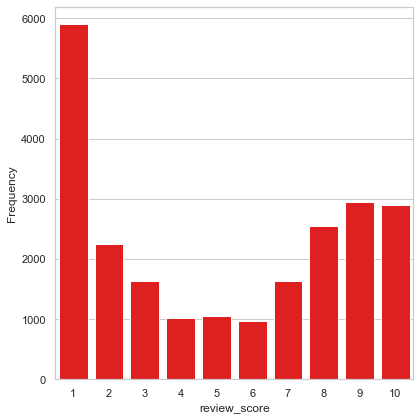

In [122]:
feat = 'review_score'
plot_bar.plot_bar(df_no_duplicates,feat,'../Results/01/Bar-'+feat+'.png')

<Figure size 432x432 with 0 Axes>

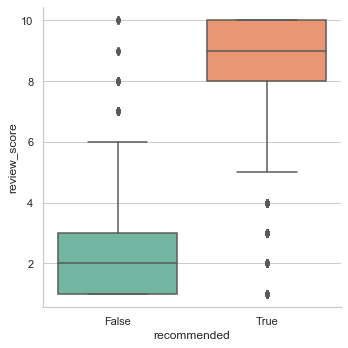

In [123]:
feat_x = 'recommended'
feat_y = 'review_score'
plot_grouped_box.plot_grouped_box(df_no_duplicates,feat_x,feat_y,'../Results/01/Box-'+feat_x+'-'+feat_y+'.png')

<Figure size 432x432 with 0 Axes>

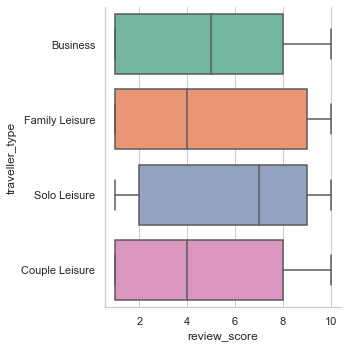

In [124]:
feat_x = 'review_score'
feat_y = 'traveller_type'
plot_grouped_box.plot_grouped_box(df_no_duplicates,feat_x,feat_y,'../Results/01/Box-'+feat_x+'-'+feat_y+'.png')

<Figure size 432x432 with 0 Axes>

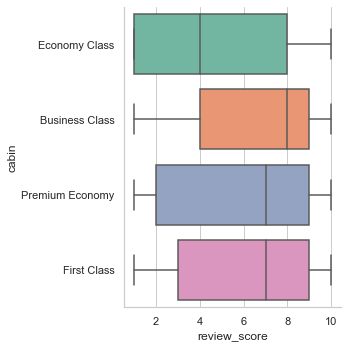

In [125]:
feat_x = 'review_score'
feat_y = 'cabin'
plot_grouped_box.plot_grouped_box(df_no_duplicates,feat_x,feat_y,'../Results/01/Box-'+feat_x+'-'+feat_y+'.png')

### 10.2 - Review subscores

Feature: seat_comfort
Values of the feature: [1, 4, 5, 3, 2]
Frequencies of the feature: [5412, 5333, 4575, 4368, 3134]


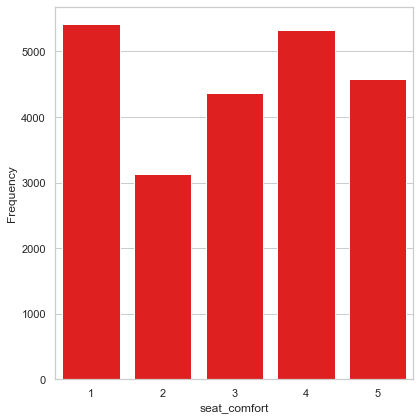

In [126]:
feat = 'seat_comfort'
plot_bar.plot_bar(df_no_duplicates,feat,'../Results/01/Bar-'+feat+'.png')

<Figure size 432x432 with 0 Axes>

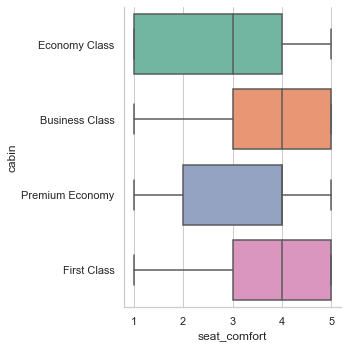

In [127]:
feat_x = 'seat_comfort'
feat_y = 'cabin'
plot_grouped_box.plot_grouped_box(df_no_duplicates,feat_x,feat_y,'../Results/01/Box-'+feat_x+'-'+feat_y+'.png')

Feature: cabin_service
Values of the feature: [5, 1, 4, 3, 2]
Frequencies of the feature: [7534, 5186, 4062, 3262, 2778]


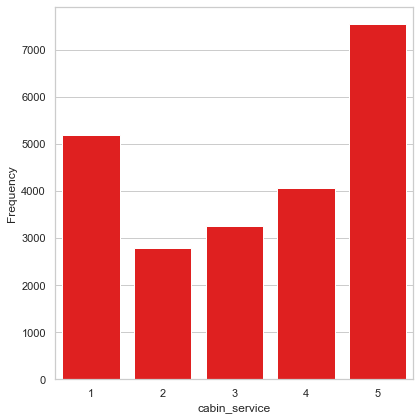

In [128]:
feat = 'cabin_service'
plot_bar.plot_bar(df_no_duplicates,feat,'../Results/01/Bar-'+feat+'.png')

<Figure size 432x432 with 0 Axes>

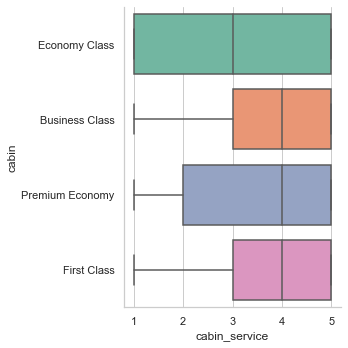

In [129]:
feat_x = 'cabin_service'
feat_y = 'cabin'
plot_grouped_box.plot_grouped_box(df_no_duplicates,feat_x,feat_y,'../Results/01/Box-'+feat_x+'-'+feat_y+'.png')

Feature: food_bev
Values of the feature: [1, 5, 4, 3, 2]
Frequencies of the feature: [6820, 4583, 4399, 3932, 3088]


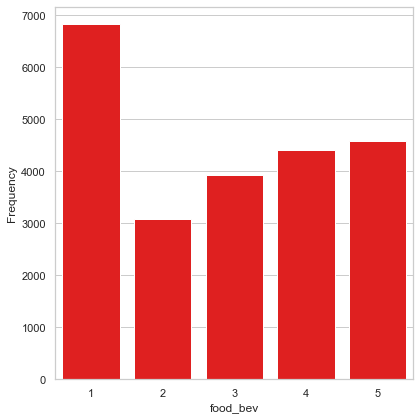

In [130]:
feat = 'food_bev'
plot_bar.plot_bar(df_no_duplicates,feat,'../Results/01/Bar-'+feat+'.png')

<Figure size 432x432 with 0 Axes>

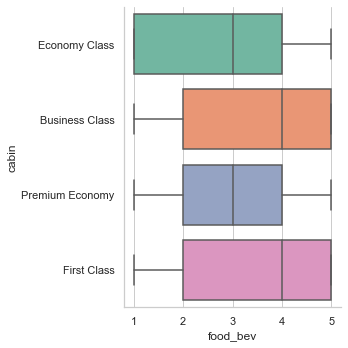

In [131]:
feat_x = 'food_bev'
feat_y = 'cabin'
plot_grouped_box.plot_grouped_box(df_no_duplicates,feat_x,feat_y,'../Results/01/Box-'+feat_x+'-'+feat_y+'.png')

Feature: entertainment
Values of the feature: [1, 4, 5, 3, 2]
Frequencies of the feature: [6709, 4840, 4434, 4161, 2678]


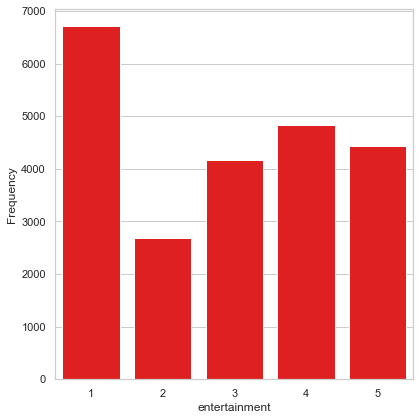

In [132]:
feat = 'entertainment'
plot_bar.plot_bar(df_no_duplicates,feat,'../Results/01/Bar-'+feat+'.png')

Feature: ground_service
Values of the feature: [1, 5, 4, 3, 2]
Frequencies of the feature: [7513, 5244, 4673, 3178, 2214]


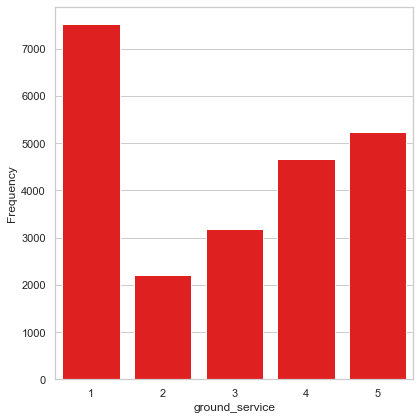

In [133]:
feat = 'ground_service'
plot_bar.plot_bar(df_no_duplicates,feat,'../Results/01/Bar-'+feat+'.png')

Feature: value_for_money
Values of the feature: [1, 5, 4, 3, 2]
Frequencies of the feature: [6678, 5778, 4353, 3119, 2894]


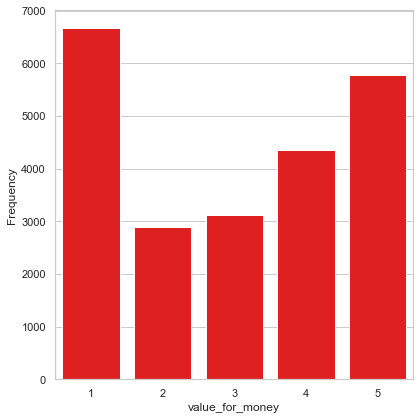

In [134]:
feat = 'value_for_money'
plot_bar.plot_bar(df_no_duplicates,feat,'../Results/01/Bar-'+feat+'.png')

### 10.3 - Review date

Feature: review_date_day
Values of the feature: [4.0, 15.0, 5.0, 20.0, 14.0, 13.0, 2.0, 22.0, 1.0, 23.0, 18.0, 3.0, 10.0, 28.0, 12.0, 11.0, 7.0, 8.0, 21.0, 19.0, 6.0, 9.0, 26.0, 17.0, 16.0, 29.0, 27.0, 30.0, 25.0, 24.0, 31.0]
Frequencies of the feature: [815, 793, 782, 780, 774, 773, 772, 769, 769, 767, 767, 759, 755, 753, 752, 749, 748, 743, 743, 743, 728, 722, 719, 717, 708, 705, 704, 695, 680, 674, 464]


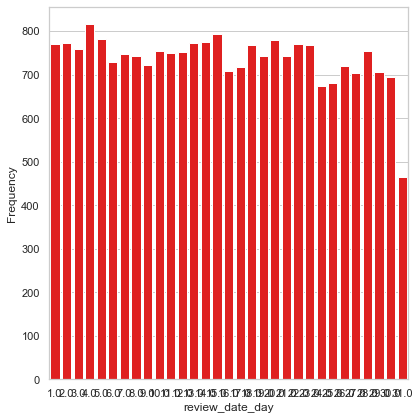

In [135]:
feat = 'review_date_day'
plot_bar.plot_bar(df_no_duplicates,feat,'../Results/01/Bar-'+feat+'.png')

Feature: review_date_month
Values of the feature: [1.0, 7.0, 8.0, 10.0, 11.0, 9.0, 12.0, 4.0, 6.0, 3.0, 2.0, 5.0]
Frequencies of the feature: [2329, 2111, 2097, 1991, 1967, 1949, 1893, 1796, 1782, 1771, 1661, 1475]


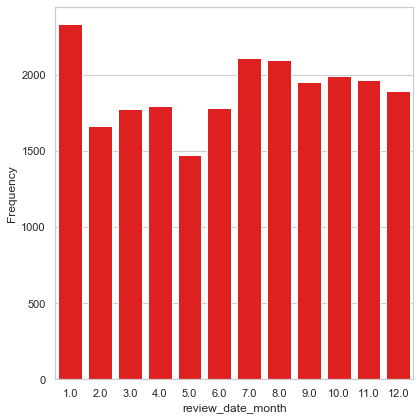

In [136]:
feat = 'review_date_month'
plot_bar.plot_bar(df_no_duplicates,feat,'../Results/01/Bar-'+feat+'.png')

Feature: review_date_year
Values of the feature: [2018.0, 2016.0, 2017.0, 2015.0, 2019.0]
Frequencies of the feature: [5746, 5662, 5097, 4116, 2201]


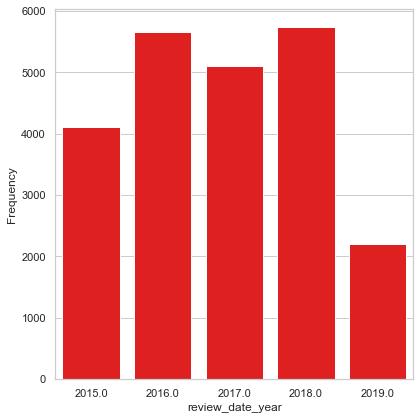

In [137]:
feat = 'review_date_year'
plot_bar.plot_bar(df_no_duplicates,feat,'../Results/01/Bar-'+feat+'.png')

### 10.4 - Date flown

Feature: date_flown_day
Values of the feature: [16.0, 1.0]
Frequencies of the feature: [21330, 1492]


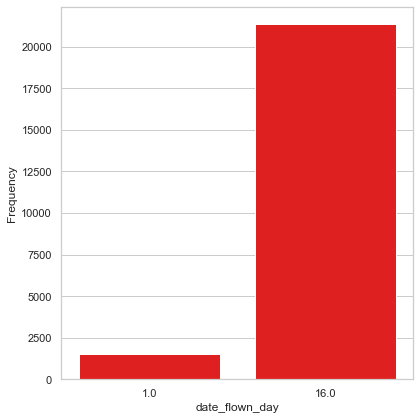

In [138]:
feat = 'date_flown_day'
plot_bar.plot_bar(df_no_duplicates,feat,'../Results/01/Bar-'+feat+'.png')

Feature: date_flown_month
Values of the feature: [8.0, 7.0, 1.0, 12.0, 6.0, 10.0, 9.0, 11.0, 3.0, 4.0, 2.0, 5.0]
Frequencies of the feature: [2155, 2138, 2136, 2116, 1969, 1912, 1909, 1872, 1781, 1773, 1569, 1492]


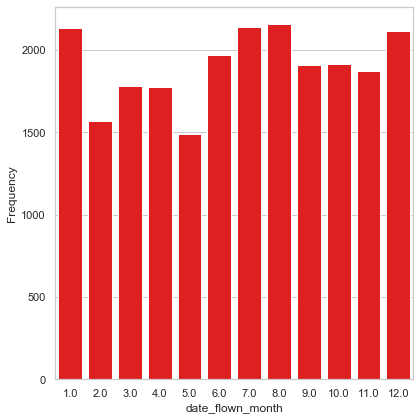

In [139]:
feat = 'date_flown_month'
plot_bar.plot_bar(df_no_duplicates,feat,'../Results/01/Bar-'+feat+'.png')

Feature: date_flown_year
Values of the feature: [2018.0, 2016.0, 2017.0, 2015.0, 2019.0, 2014.0, 2013.0]
Frequencies of the feature: [5698, 5472, 5098, 4555, 1927, 70, 2]


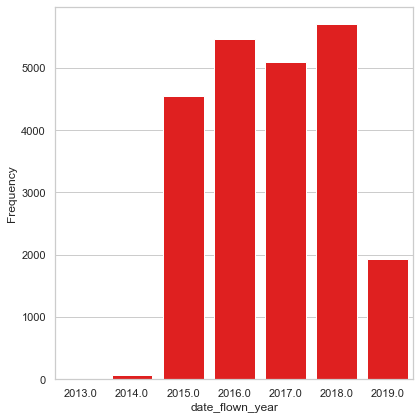

In [140]:
feat = 'date_flown_year'
plot_bar.plot_bar(df_no_duplicates,feat,'../Results/01/Bar-'+feat+'.png')

### 10.5 - Distance in days from date flown to review date

Feature: review_date_date_flown_distance_days


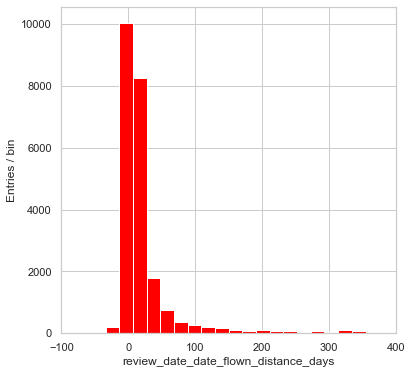

In [141]:
feat = 'review_date_date_flown_distance_days'
plot_hist.plot_hist(df=df_no_duplicates,
          feat=feat,
          bins=100,
          x_min=-100,
          x_max=400,
          filename='../Results/01/Hist-'+feat+'.png')

### 10.6 - Length of the review text

Feature: review_characters


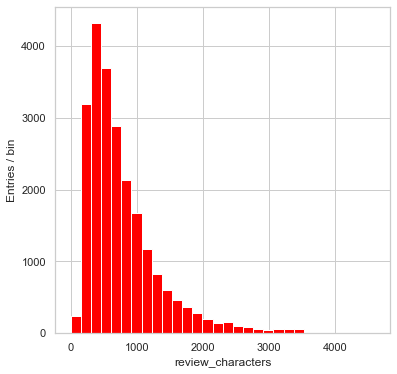

In [142]:
feat = 'review_characters'
plot_hist.plot_hist(df=df_no_duplicates,
          feat=feat,
          bins=30,
          filename='../Results/01/Hist-'+feat+'.png')

### 10.7 - Recommendation and other Boolean features

Feature: recommended
Values of the feature: [False, True]
Frequencies of the feature: [11759, 11063]


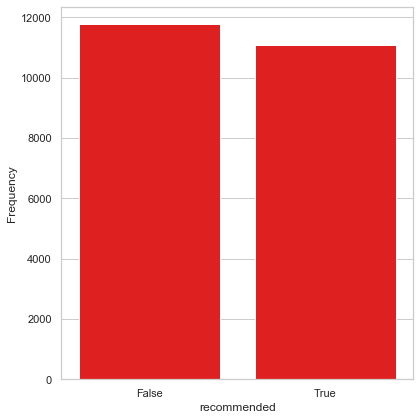

Feature: has_layover
Values of the feature: [False, True]
Frequencies of the feature: [14073, 8749]


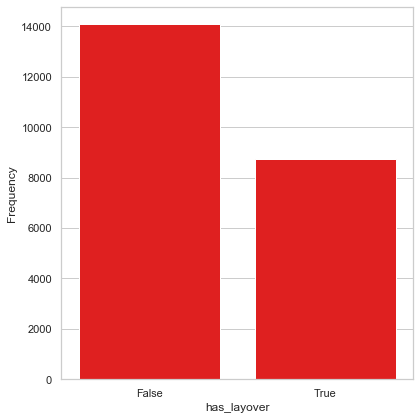

In [143]:
# Histogram of occurrences of each value of each Boolean feature.
for feat in feats_bool:
    plot_bar.plot_bar(df_no_duplicates,feat,'../Results/01/Bar-'+feat+'.png')

### 10.8 - Relationship between recommendation and review score

In [144]:
df_recommended = df_no_duplicates[df_no_duplicates['recommended']==True].copy()
df_not_recommended = df_no_duplicates[df_no_duplicates['recommended']==False].copy()

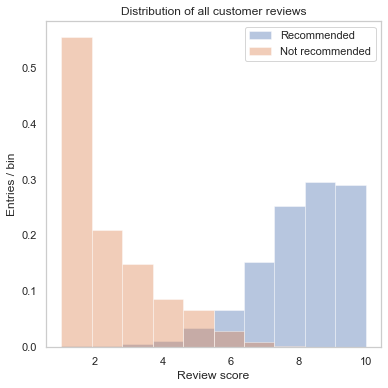

In [145]:
plot_two_hists_comp_sns.plot_two_hists_comp_sns(df_1=df_recommended,
                                                df_2=df_not_recommended,
                                                label_1='Recommended',
                                                label_2='Not recommended',
                                                feat='review_score',
                                                bins=10,
                                                title='Distribution of all customer reviews',
                                                x_label='Review score',
                                                y_label='Entries / bin',
                                                filename='../Results/01/HistRecAndNotRec.png'
                                               )

### 10.9 - Relationship between review score and length of the review text

We calculated the length of the review text in terms of number of characters.

Positive customer reviews tend to be shorter than negative customer reviews (see mean of the distribution of the number of characters in the customer review). The same trend is observed if using the number of words instead of the number of characters.

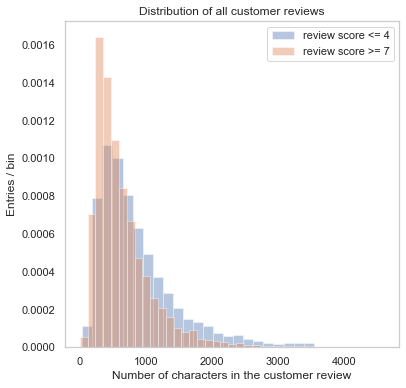

In [146]:
plot_two_hists_comp_sns.plot_two_hists_comp_sns(df_1=df_no_duplicates[df_no_duplicates['review_score']<=4],
                        df_2=df_no_duplicates[df_no_duplicates['review_score']>=7],
                        label_1='review score <= 4',
                        label_2='review score >= 7',
                        feat='review_characters',
                        bins=30,
                        title='Distribution of all customer reviews',
                        x_label='Number of characters in the customer review',
                        y_label='Entries / bin',
                        filename='../Results/01/HistReviewCharactersByReviewScore.png')

## 11 - Save the dataset

In [147]:
df_no_duplicates_types = df_no_duplicates.dtypes.to_frame('dtypes').reset_index()

In [148]:
df_no_duplicates.to_csv('../Results/PreprocessedDataLight.csv')
df_no_duplicates_types.to_csv('../Results/PreprocessedDataLightTypes.csv')